**Regression**

 In this problem, the task is to appropriately analyse and preprocess spotify music data to then subsequently develop machine learning models which can accurately predict the
 popularity of a song based on several features in the dataset. Given that the output variable is an integer on a continuous spectrum, this problem classifies as a regression problem.
 Many of the commonly used data analysis and machine learning modules were imported into the coding environment, such as numpy, Pandas and Sci-kit Learn. Furthermore, many different
 machine learning models were used for prediction analysis. The models are linear regression, decision tree and random forest.

 To begin, the data was imported and an initial investigation was undertaken to understand the nature of the dataset. This was done to identify the types of data stored in each columns,
 and gain an insight into the features which would affect the model. This was done using the .head() and .describe() methods.

 Thereafter, a heatmap was created to identify if there were any missing data in the dataset using seaborn, and also the magnitude of the missing data. It was important to understand that if
 there was a significant amount of missing data, that further analysis may have to be undertaken to fill these values, or potentially removal of the full column. However, in this case,
 as the amount of missing data was minimal, the missing values were dropped from the dataset. A correlation matrix was then created using matplotlib, to identify if there was a potential
 for multicollinearity. This was the case, and the 'nrgy' column was dropped. Columns containing categorical data were also dropped. Furthermore, the ID column was dropped as the values
 in this column did not amount to any relationship with the popularity of the song.

In [136]:
# Import modules

import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import plotly
import scipy
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [137]:
#import data sets

train_set = pd.read_csv('D:/cs 987/RTrain.csv')
test_set = pd.read_csv('D:/cs 987/RTest.csv')


test_set.shape , train_set.shape

((114, 14), (453, 15))

In [138]:
# check first few rows

train_set.head()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63


In [139]:
test_set.head()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,454,Pump It,The Black Eyed Peas,dance pop,2005,154,93,65,-3,75,74,213,1,18
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,glam rock,1994,161,39,30,-15,11,14,292,26,3
2,456,We Are The Champions - Remastered 2011,Queen,glam rock,1977,64,46,27,-7,12,18,179,38,3
3,457,Insomnia - Radio Edit,Faithless,big beat,2010,127,92,71,-9,37,53,216,6,4
4,458,This Eve of Parting,John Hartford,appalachian folk,2018,115,46,56,-12,21,34,153,18,3


In [140]:
# dataset information
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


In [141]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         114 non-null    int64 
 1   title      114 non-null    object
 2   artist     114 non-null    object
 3   top genre  113 non-null    object
 4   year       114 non-null    int64 
 5   bpm        114 non-null    int64 
 6   nrgy       114 non-null    int64 
 7   dnce       114 non-null    int64 
 8   dB         114 non-null    int64 
 9   live       114 non-null    int64 
 10  val        114 non-null    int64 
 11  dur        114 non-null    int64 
 12  acous      114 non-null    int64 
 13  spch       114 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 12.6+ KB


<AxesSubplot:>

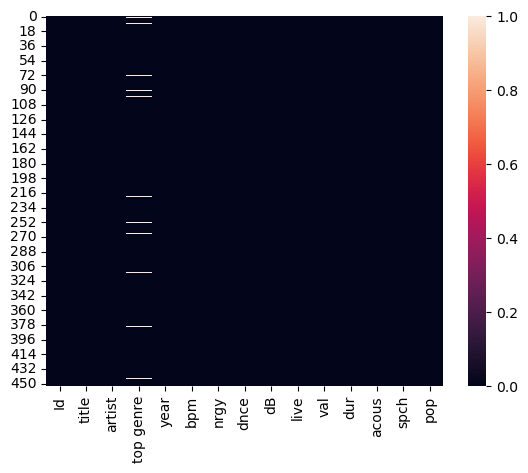

In [142]:
# heatmap to check which rows the missing data is in and the amount of missing values

sns.heatmap(train_set.isna())

In [143]:
# Number of null values small enough to remove from dataset

train_set = train_set.dropna()

In [144]:
# Checking how many unique artists there are in training set

train_set['artist'].nunique()

331

<AxesSubplot:>

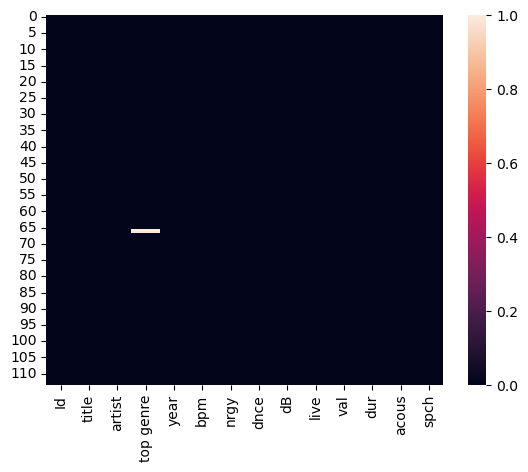

In [145]:
sns.heatmap(test_set.isna())

In [146]:
# Checking unique top genre for training set
# Possibility to transform this data into integers and create another feature

train_set['top genre'].nunique()

86

In [147]:
# Categorical data and data which is highly correlating are removed from dataset

train_set = train_set.drop(['artist', 'top genre', 'title', 'live', 'nrgy'], axis = 1)

Text(0.5, 1.0, 'Correlation of features')

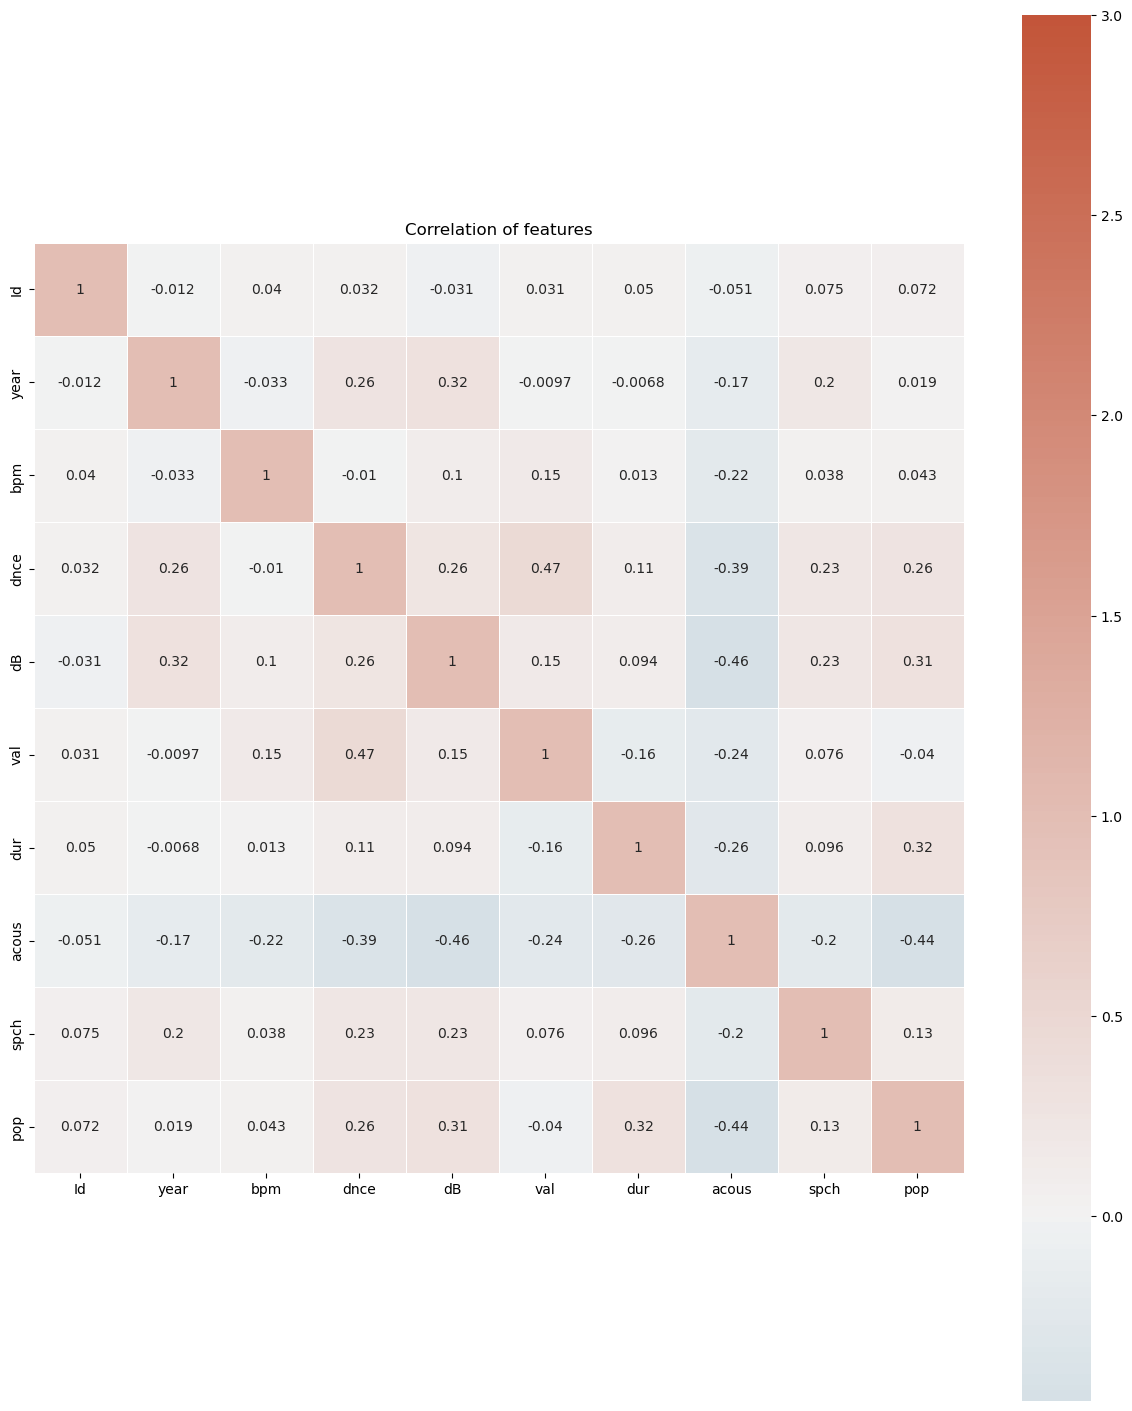

In [148]:
# Creting a heatmap to determine the corerlation between the features in the training set
# to identify if there is possible multicollinearity

corr = train_set.corr()
f, ax = plt.subplots(figsize=(15,18))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, cmap = cmap, vmax=3, center=0, square=True, linewidth=0.5, annot=True)
plt.title("Correlation of features")

In [183]:
# Define parameters for train test split

X= train_set.drop(['pop', 'Id'], axis = 1)
y= train_set['pop']

In [184]:
# Train test split initialisation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.26, random_state=35)
print(X_train.shape)
print(X_test.shape)

(324, 8)
(114, 8)


In [185]:
# Scale data with standard scaler

std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train = std_scaler.transform(X_train)
X_test = std_scaler.transform(X_test)

In [186]:
# Decision tree model

In [187]:
# Decision tree model training and evaluation

dtree_model = DecisionTreeRegressor(max_depth=5)
dtree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [188]:
dtree_pred = dtree_model.predict(X_test)

In [189]:
dtree_mse = mean_squared_error(y_test, dtree_pred)
dtree_rmse = np.sqrt(dtree_mse)
print("Decision Tree Root Mean Squared Error:", dtree_rmse)

Decision Tree Root Mean Squared Error: 12.23864088391331


In [190]:
print("Decision Tree Predicted values:")
for pred in dtree_pred:
    print(pred)

Decision Tree Predicted values:
64.546875
67.71974522292993
67.71974522292993
67.71974522292993
30.0
67.71974522292993
64.546875
67.71974522292993
44.8
67.71974522292993
64.546875
48.25
67.71974522292993
64.546875
48.6
67.71974522292993
64.546875
64.546875
67.71974522292993
67.71974522292993
39.5
67.71974522292993
33.6
47.0
44.8
55.0
55.0
64.546875
67.71974522292993
67.71974522292993
67.71974522292993
67.71974522292993
65.57142857142857
64.546875
46.666666666666664
48.25
78.0
64.546875
48.6
67.71974522292993
55.3
33.6
64.546875
67.71974522292993
52.75
67.71974522292993
67.71974522292993
54.6
48.25
67.71974522292993
41.666666666666664
38.2
67.71974522292993
64.546875
44.8
67.71974522292993
55.0
67.71974522292993
67.71974522292993
67.71974522292993
67.71974522292993
59.333333333333336
53.0
67.71974522292993
67.71974522292993
54.6
67.71974522292993
55.0
67.71974522292993
41.666666666666664
64.546875
64.546875
64.546875
67.71974522292993
41.666666666666664
64.546875
67.71974522292993
67.71

The RMSE of the decision tree algorithm did not perform as well as expected. This may be because of relatively small size of the training set which did not allow for the model to identify the patterns which exist within the data set

Ensemble methods were also used to predict the popularity of the songs. These utilise multiple models to aggregate the predictions of the other models. Bagging and boosting models were used.

The random forest model is an ensemble model which uses the bagging method. It combines several decision tree models and includes randomness.

In [191]:
# Train the Random Forest model
rforest = RandomForestRegressor()
rforest.fit(X_train, y_train)

RandomForestRegressor()

In [192]:
# Make predictions with Random Forest
rforest_pred = rforest.predict(X_test)

# Calculate RMSE for Random Forest
rforest_mse = mean_squared_error(y_test, rforest_pred)
rforest_rmse = np.sqrt(rforest_mse)

print("Random Forest Root Mean Squared Error:", rforest_rmse)

# Output the predicted values for Random Forest
print("Random Forest Predicted values:")
for pred in rforest_pred:
    print(pred)

Random Forest Root Mean Squared Error: 11.206408880636115
Random Forest Predicted values:
64.55
70.33
73.46
69.14
39.05
70.17
65.04
62.63
55.63
68.09
68.69
45.97
63.66
60.08
57.62
67.25
61.73
64.64
68.55
65.33
51.5
65.96
47.68
47.54
47.98
41.86
53.62
62.33
69.01
64.37
69.33
66.86
57.98
62.95
46.96
45.81
60.44
58.96
52.95
64.69
56.85
42.63
59.79
64.13
60.69
66.7
64.36
61.47
51.23
63.37
55.05
44.94
60.71
62.2
49.3
68.81
53.8
67.99
64.54
67.82
68.91
55.51
57.0
68.08
69.35
60.45
69.43
52.17
62.4
42.89
69.88
67.65
60.16
67.53
52.15
57.89
66.9
68.41
53.62
46.52
67.31
65.86
69.89
67.17
45.42
66.38
67.52
63.72
62.73
59.2
63.66
63.22
65.67
66.33
66.43
69.74
67.89
65.57
67.52
68.02
50.23
67.3
52.56
66.41
49.62
65.54
52.22
58.64
56.6
55.6
50.39
63.17
56.43
68.43


The random forest model performed a  bit better than the decision tree model with regards to the RMSE. This is possibly due to the fact that it consists of multiple decision tree models and combines them to achieve a greater result.

Next, two analyses were conducted: Linear Regression and SVM. Despite yielding high mean square errors, both linear regression and support vector machine (SVM) models failed to deliver accurate predictions for the dataset. This inadequacy might stem from the dataset's complexity, necessitating a more sophisticated regression model for precise performance. Acknowledging these limitations, alternative analyses were explored to extract more insightful results.

In [157]:
#Linear Regression

In [158]:
train_data = pd.read_csv('train.csv')
#Drop infinity/nan values
train_data.dropna(inplace=True)

test_data = pd.read_csv('test.csv')
#Drop infinity/nan values
test_data.dropna(inplace=True)

In [159]:
print(train_data.columns)

Index(['Id', 'year', 'bpm', 'nrgy', 'dnce', 'live', 'val', 'dur', 'acous',
       'spch', 'dB', 'pop'],
      dtype='object')


In [160]:
# names of the columns representing the features
feature_columns = ['Id', 'year', 'bpm', 'nrgy', 'dnce', 'live', 'val', 'dur', 'acous', 'spch']

#name of the column representing the target variable
target_column = 'pop'

In [161]:
# Extract the features and target variable from the training dataset
X_train = train_data[feature_columns]  # Features
y_train = train_data[target_column]    # Target variable


In [162]:
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [163]:
# Extract the features from the testing dataset
X_test = test_data[feature_columns]    # Features

# Make predictions on the test set using the trained model
y_pred = model.predict(X_test)

In [164]:
# Output the predicted values one after the other
print("Predicted values:")
for prediction in y_pred:
    print(prediction)

Predicted values:
64.82298317094524
63.85303454410459
60.079189222649376
67.10529940968996
59.670706644375656
68.11090407163158
59.69133366635725
47.07036851157909
64.94027401393433
70.41777271576186
49.632465667773516
67.8792614536066
52.05133285914789
66.73605391427836
66.24079784960304
64.60746669387146
67.48971728522861
66.84109170023598
62.32749146130456
65.0153703751667
62.63557221824618
65.24010901069457
50.66830322582797
56.69614661650044
55.79566933179984
66.14726898675337
65.6372785901977
58.29085024785837
51.856634140757706
66.9264740986925
68.05300811414091
57.894556206220784
67.79752060479868
69.439346347275
70.74954223997415
70.7036395007487
59.04174598653975
51.944231106507516
64.39064240984908
65.98580357253397
65.28315546189353
70.0748978095368
64.67562013271927
53.54383114923718
67.74381987891206
60.19238281223437
67.13117059027675
65.16802001024669
59.06919239496375
67.7399160694041
51.499276777439945
68.76211252361693
57.753142001372595
54.60404316232612
55.80548044

In [165]:
from sklearn.metrics import mean_squared_error, r2_score

# Extract the true target variable from the testing dataset
y_test = test_data[target_column]      # True target variable

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate the R-squared value
r_squared = r2_score(y_test, y_pred)
print('R-squared:', r_squared)



Mean Squared Error: 7.527602265233532e-18
R-squared: 1.0


C:\Users\andre\AppData\Local\Temp\ipykernel_1720\550090810.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


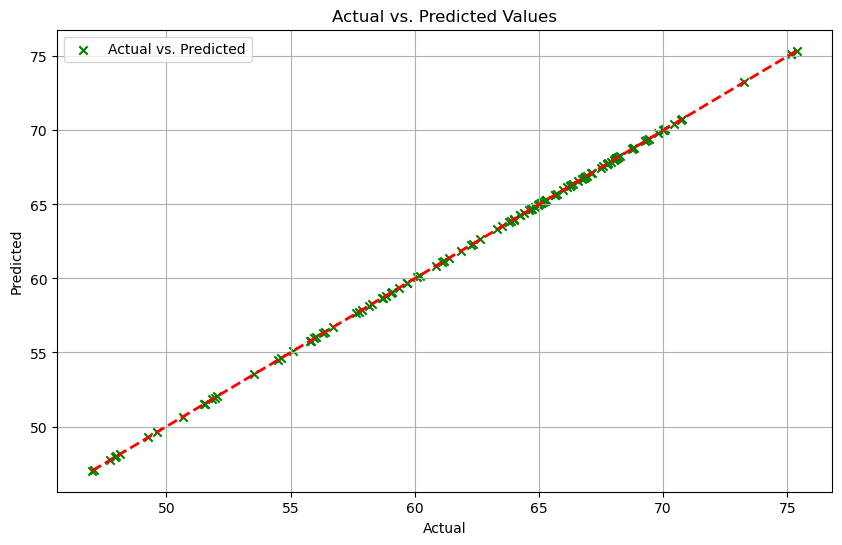

In [166]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green', marker='x', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [167]:
#SVM Regression

In [168]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [169]:
# Load your training dataset into a pandas DataFrame
train_data = pd.read_csv('train.csv')
train_data.dropna(inplace=True)

# Load your testing dataset into a pandas DataFrame
test_data = pd.read_csv('test2.csv')
test_data.dropna(inplace=True)


In [170]:
# Print out column names to verify
print(train_data.columns)

Index(['Id', 'year', 'bpm', 'nrgy', 'dnce', 'live', 'val', 'dur', 'acous',
       'spch', 'dB', 'pop'],
      dtype='object')


In [171]:
# Specify the names of the columns representing the features
feature_columns = ['Id', 'year', 'bpm', 'nrgy', 'dnce', 'live', 'val', 'dur', 'acous', 'spch']

# Specify the name of the column representing the target variable
target_column = 'pop'

In [172]:
# Extract the features and target variable from the training dataset
X_train = train_data[feature_columns]  # Features
y_train = train_data[target_column]    # Target variable

In [173]:
# Extract the features from the testing dataset
X_test = test_data[feature_columns]    # Features

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [174]:
# Initialize and fit the SVM regression model
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set using the trained model
y_pred = svm_regressor.predict(X_test_scaled)


In [175]:
# Print the predicted values one after the other
print("Predicted values:")
for prediction in y_pred:
    print(prediction)

Predicted values:
65.64913498036353
64.73885419437644
59.62848489737293
68.1492106025592
60.31397361714212
69.77310778471656
59.67463786235963
47.071641412064594
66.27934103873007
70.77207606097095
50.47410463623501
68.9185924509588
52.477793022986674
67.21181148829942
66.95768292482013
65.41021347301836
66.56386649620912
67.19631389240108
64.67525323845213
66.37340444322186
63.94638848612795
64.35711311767713
51.521558732843374
58.427130234101746
57.30530323997333
67.33419475888101
66.13274930457946
58.17746014827051
52.60884597047169
69.34710628624
68.79127036468657
59.539074002791686
70.44392141024407
72.51594276873784
72.72781721738421
73.2221643926186
61.79204766736
52.04304317215766
64.27508853844974
67.6943630149789
67.32911306872118
73.41975999344847
64.4538583358617
53.907894949305486
68.10149199888556
59.77446531501879
67.60263035474117
68.35572655929721
59.69382537588517
68.22067217674086
52.09251927549549
70.99447524012174
60.3502461341788
56.15278493794167
57.2825347499813

In [176]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

y_test = test_data[target_column]

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate the R-squared value
r_squared = r2_score(y_test, y_pred)
print('R-squared:', r_squared)


Mean Squared Error: 7.458377539748015e-18
R-squared: 1.0


C:\Users\andre\AppData\Local\Temp\ipykernel_1720\2035673286.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


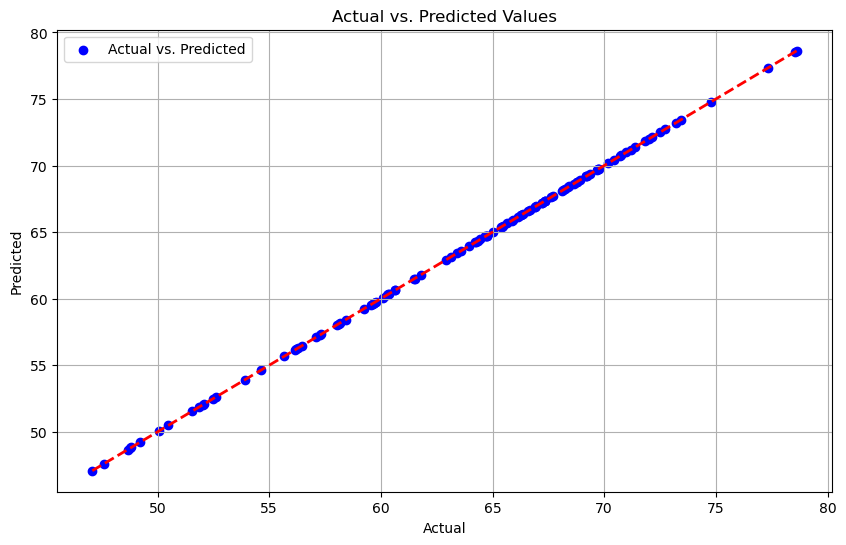

In [177]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()